# Лабораторная работа 3. Классификация. Нейронные сети

## 1. Введение

**Цель работы:** изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

**Постановка задачи:**

1. Необходимо выбрать и подготовить датасет для классификации, затем построить классификационные модели с помощью пяти методов:

    - Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);

    - Деревья решений (Decision Tree);

    - Линейный дискриминантный анализ (Linear Discriminant Analysis);

    - Метод опорных векторов (Support Vector Machines);

    - Метод ближайших соседей (k-Nearest Neighbors);

2. Затем сравните качество работы классификаторов с помощью следующих метрик:

    - Accuracy (точность),

    - Precision (доля правильно классифицированных положительных примеров),

    - Recall (чувствительность, доля верно найденных положительных примеров),

    - F1-Score (среднее гармоническое precision и recall),

    - Площадь под кривой ROC (AUC-ROC).

3. Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

5. (Опционально на дополнительные баллы): Постройте нейронную сеть для классификации на TensorFlow. Организуйте 5-кратную кросс-валидацию для надежной оценки качества. Методом Grid Search с кросс-валидацией подберите оптимальную скорость обучения (3 различных значения) и архитектуру сети (3 варианта). Настройте TensorBoard для отслеживания accuracy / loss на каждом фолде. Сравнения различных конфигураций модели. Сравните финальную accuracy с baseline-моделью и проанализируйте эффект от настройки параметров.

## 2. Выбор и подготовка датасета

### Описание датасета

В качестве исходных данных использовался набор «Breast Cancer Maryland Dataset». Признаки формируются на основе анализа оцифрованных изображений тонкоигольной аспирационной биопсии (FNA) опухоли. Они отражают свойства клеточных ядер, выделенных из изображения.

Классификация выполняется по диагнозу: опухоль относится либо к доброкачественной (Benign - B), либо к злокачественной (Malignant - M).

Для каждого ядра вычисляется десять базовых количественных характеристик:

- radius - среднее расстояние от центра до границы;

- texture - стандартное отклонение уровней серого;

- perimeter - периметр;

- area - площадь;

- smoothness - степень локальных колебаний радиуса;

- compactness - компактность (обычно (perimeter²)/area − 1);

- concavity - выраженность вогнутостей контура (степень вогнутости - насколько контур имеет вогнутые части);

- concave points - число вогнутых участков;

- symmetry - симметричность;

- fractal dimension - фрактальная размерность.

Для каждого из этих параметров дополнительно вычисляются три агрегата: среднее значение, стандартная ошибка и «наихудшее» значение (максимум среди нескольких наиболее крупных). В итоге получается 30 признаков.

Например:
- поле 3 - Mean Radius (средний радиус),
- поле 13 - Radius SE (стандартная ошибка радиуса),
- поле 23 - Worst Radius (наибольший радиус).

### Загрузка данных

Загрузим данные из датасета:

In [24]:
import pandas as pd

file_path = "bcm_dataset.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Unnamed: 32', 'id'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Характеристика признаков и целей, предобработка данных

Проведем дескриптивный анализ:

In [23]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Дескриптивный анализ позволяет получить общее представление о статистических свойствах признаков, описывающих клеточные характеристики опухолей. В датасете содержится 569 образцов, и для каждого рассчитано 30 числовых параметров. Пропусков нет - все признаки имеют одинаковое число наблюдений.

Средние значения отражают общую структуру данных: например, средний радиус ядра (radius_mean) равен примерно 14,13, а средняя площадь (area_mean) - около 654,89. При этом высокая величина стандартного отклонения (особенно у площади - более 350) показывает выраженную разнородность размеров клеток среди образцов. Показатели, связанные с формой клеток - smoothness, compactness, concavity - имеют меньшие средние значения, но их разброс указывает на заметные различия между доброкачественными и злокачественными случаями.

Характеристики симметрии и фрактальной размерности (symmetry_mean ≈ 0,18; fractal_dimension_mean ≈ 0,063) также находятся на сравнительно низких уровнях, что соответствует умеренной асимметрии клеточных структур. «Наихудшие» показатели имеют значительно более высокие значения - например, radius_worst = 16,27 и area_worst = 880,58 - поскольку они отражают наиболее выраженные патологические изменения в клетках.

Выраженный разброс значений, особенно у признаков размера и формы, подтверждает наличие как доброкачественных, так и злокачественных опухолей. Наиболее информативными для различения типов новообразований являются признаки, представляющие «наихудшие» характеристики клеток.

Построим гистограммы распределений:

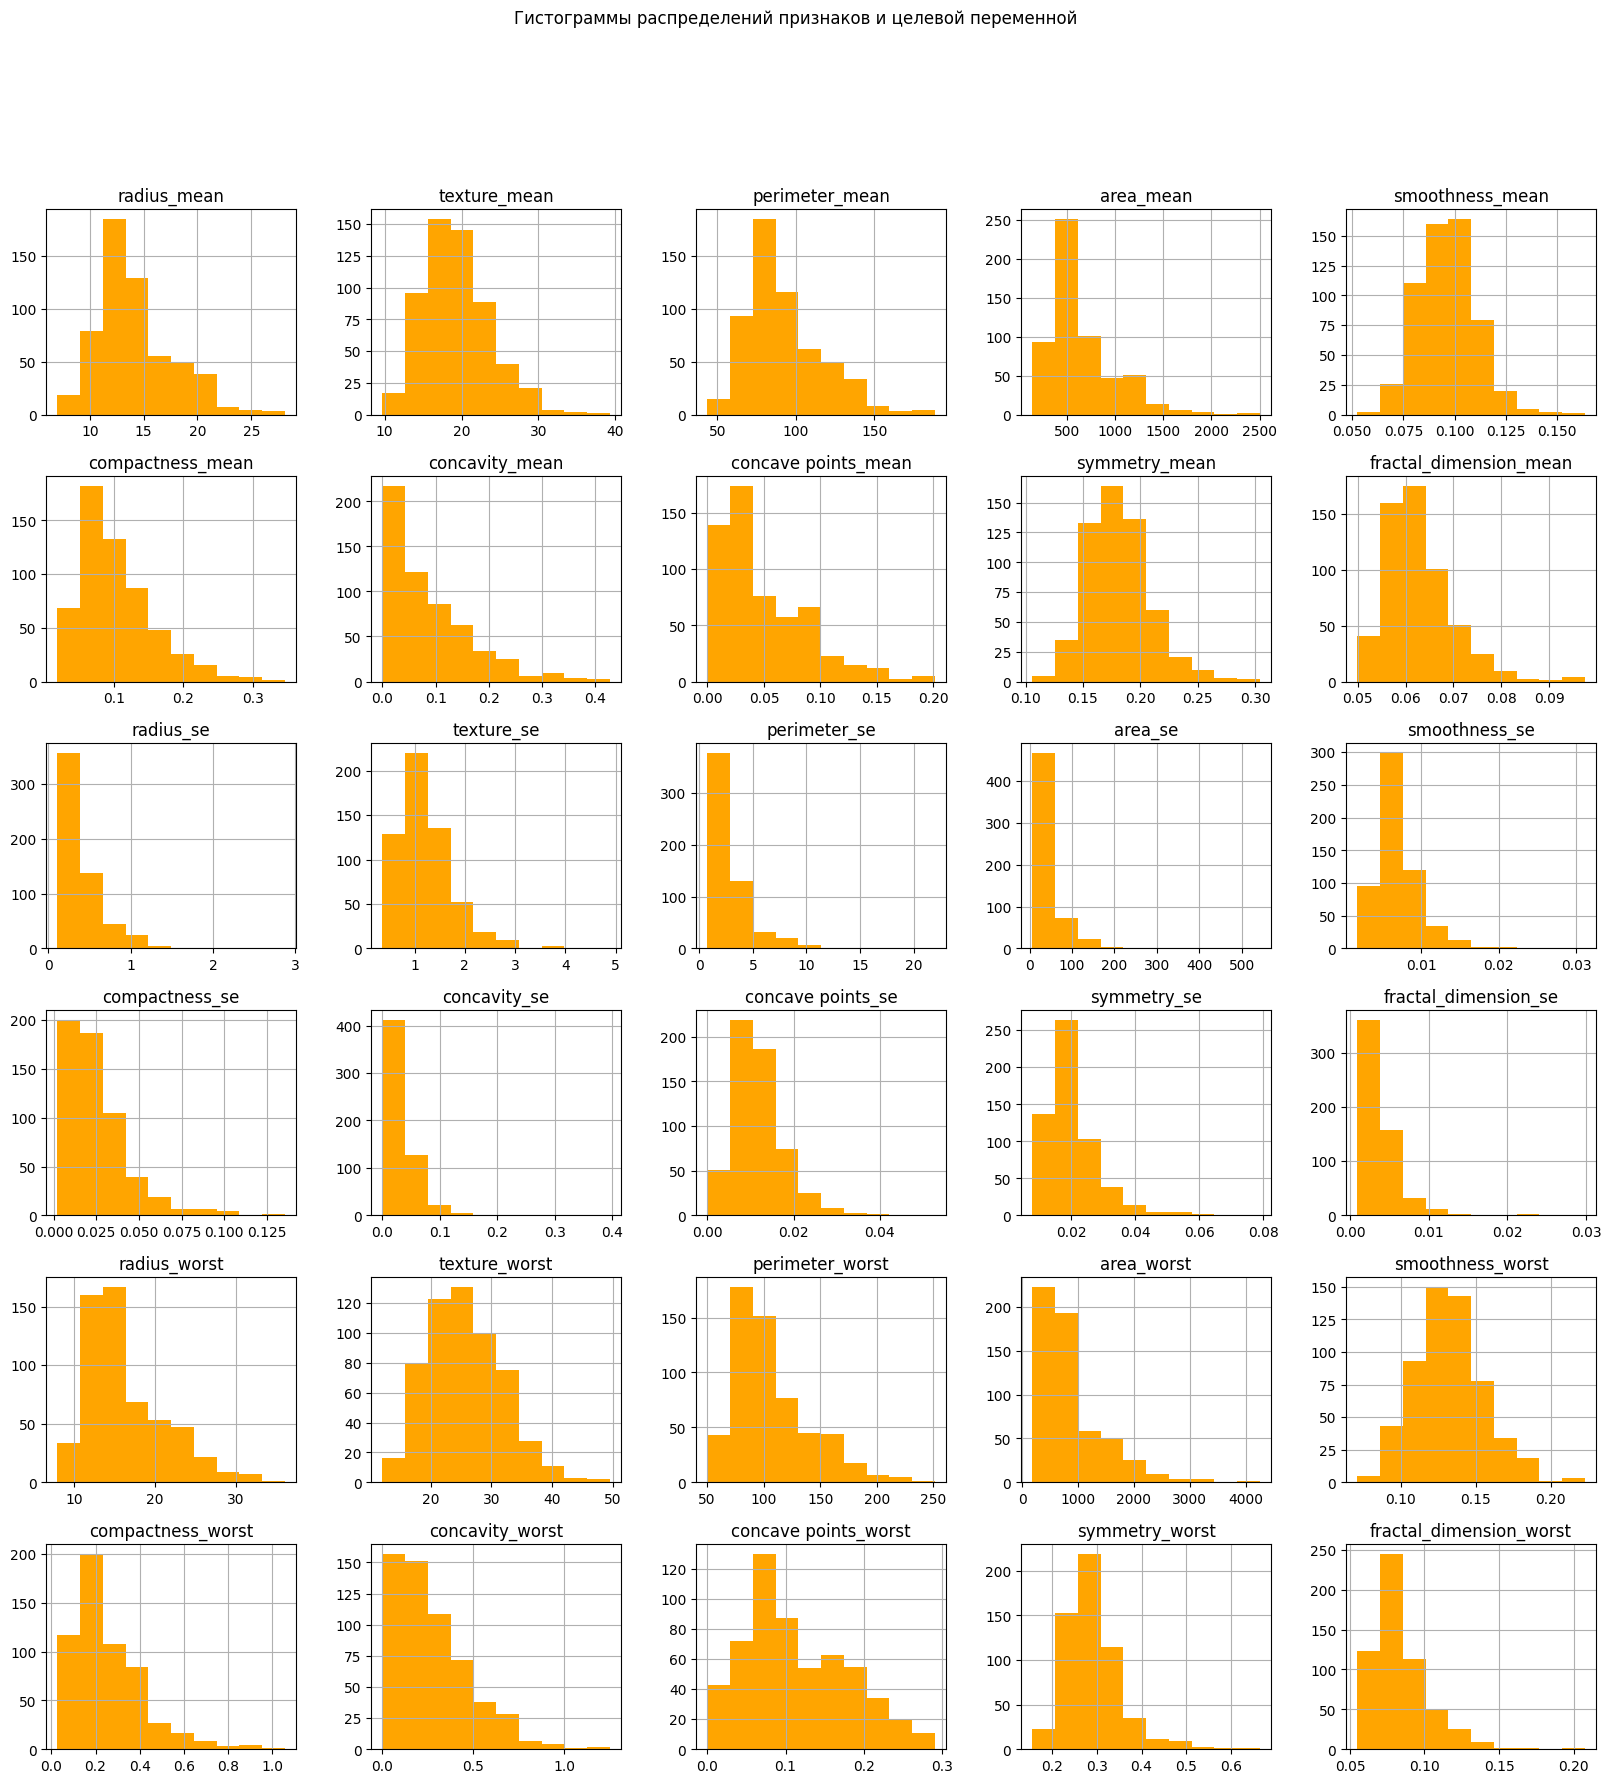

In [25]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20, 20), color='orange')
plt.suptitle("Гистограммы распределений признаков и целевой переменной")
plt.show()

Анализ гистограмм показывает, что большинство признаков в датасете Breast Cancer Maryland не имеют нормального распределения. Распределения выраженно асимметричны и чаще всего смещены вправо, то есть основные значения сосредоточены в нижнем диапазоне, а крупные значения встречаются значительно реже.

Параметры вроде radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean и concave_points_mean напоминают экспоненциальные или логнормальные распределения: большинство опухолей имеет умеренные характеристики, тогда как большие значения чаще относятся к злокачественным случаям.

Некоторые признаки - например, texture_mean и symmetry_mean - ближе к симметричным, хотя всё равно не являются нормальными. Такие характеристики, как fractal_dimension_mean и smoothness_mean, распределены в узком диапазоне и имеют небольшой положительный сдвиг.

Таким образом, выборка в целом не соответствует нормальному распределению. Это подтверждает необходимость предварительной нормализации или стандартизации признаков перед обучением алгоритмов машинного обучения - например, с помощью StandardScaler или MinMaxScaler.

Приведем целевую функцию к бинарному виду:

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

map_diagnosis = {'M':1, 'B':0}

df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

df['diagnosis'].head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

Для подготовки данных к обучению модели категориальный признак diagnosis, содержащий значения M и B, был преобразован в числовой формат. Метке M было присвоено значение 1, а метке B - 0. Такое кодирование позволяет использовать признак в алгоритмах машинного обучения, которые работают только с числовыми данными.

## 3. Разбиение выборки

Разобьем выборку на обучающий (80%) и тестовый (20%) наборы:

In [29]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Мы также выполнили стандартизацию признаков (через StandardScaler). Далее, чтобы упростить процесс обучения и избежать дублирования кода, была создана отдельная функция для построения моделей. Она позволяет запускать различные классификаторы и автоматически сохранять их метрики в словарь.

In [30]:
metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}


def build_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Вероятности для положительного класса
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # На случай SVM / лин. моделей без predict_proba
        y_proba = model.decision_function(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Oranges', colorbar=True)
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    # roc_auc = roc_auc_score(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1: ", f1)
    print("ROC-AUC: ", roc_auc)

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')  # линия случайного классификатора
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая: {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    if model_name == "DecisionTree":
        plt.figure(figsize=(24, 12))
        plot_tree(
            model,
            filled=True,
            feature_names=X.columns,
            class_names=['Malignant', 'Benign'],
            fontsize=10
        )
        plt.show()
        
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)

Данная функция обучает переданную модель на тренировочных данных и оценивает её качество на тестовой выборке. После обучения она получает предсказания, сравнивает их с истинными значениями, строит матрицу ошибок и выводит её на экран. На основе результатов рассчитываются ключевые метрики - accuracy (точность классификации), precision (точность положительных предсказаний), recall (полнота), F1-score (F1-мера - гармоническое среднее между точностью (precision) и полнотой (recall)) и ROC-AUC (площадь под ROC-кривой). Все метрики сохраняются в словаре metrics_dict, что позволяет позже сравнить качество разных моделей. Если в качестве классификатора используется дерево решений, дополнительно отображается его графическая структура.

## 4. Методы классификации

### 4.1. Наивный Байесовский классификатор

Наивный байесовский классификатор - это вероятностный метод машинного обучения, основанный на теореме Байеса. Он оценивает вероятность того, что объект относится к определённому классу, опираясь на значения его признаков. Алгоритм считается «наивным», поскольку предполагает независимость признаков друг от друга, даже если в реальности между ними могут быть связи.

Несмотря на такое упрощение, метод часто показывает высокую эффективность и хорошо работает на практических задачах. Он особенно полезен при большом количестве признаков, требует минимального объёма данных и быстро обучается. Модель выбирает тот класс, для которого рассчитанная вероятность оказывается максимальной. Наивный Байес широко применяется в задачах текстовой классификации, фильтрации спама и в других областях, где необходимо быстро и надёжно определять принадлежность к классу.

В рамках данной работы для решения задачи классификации был выбран гауссовский вариант алгоритма (GaussianNB). Он хорошо подходит для данных, в которых признаки имеют распределение, близкое к нормальному, что соответствует структуре используемого датасета. GaussianNB прост в использовании, устойчив при работе с многомерными числовыми признаками и способен давать хорошие результаты даже при слабой зависимости между ними. Поэтому такой классификатор является удачным базовым вариантом для сравнения с другими моделями.

Модель строится со значениями по умолчанию:

- priors=None - априорные вероятности классов не задаются вручную,

- var_smoothing=1e-9 - небольшая добавка к дисперсии для повышения стабильности вычислений.

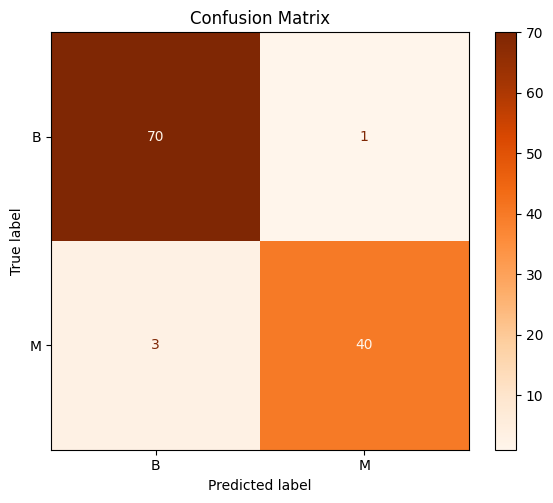

[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
Recall:  0.9302325581395349
Precision:  0.975609756097561
F1:  0.9523809523809523
ROC-AUC:  0.99737962659679


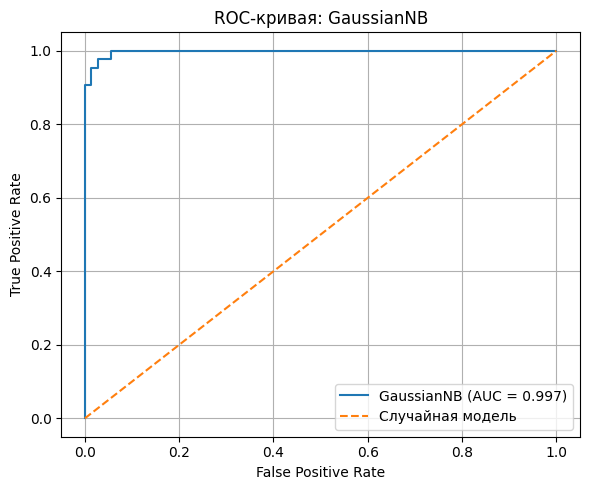

In [31]:
model_gaussianNB = GaussianNB()
build_model(model_gaussianNB, "GaussianNB")

Модель корректно классифицировала большую часть объектов. Небольшое количество ошибок связано с тем, что один доброкачественный образец был отнесён к злокачественным, а три злокачественных - ошибочно классифицированы как доброкачественные. В целом точность остаётся высокой, что говорит о хорошей способности модели различать два класса.

### 4.2. Дерево решений

Дерево решений - это модель классификации, основанная на последовательном применении правил вида «если - то». Оно имеет древовидную структуру: на каждом узле данные разделяются на подгруппы в зависимости от значения определённого признака, а в конечных листьях расположены итоговые прогнозы классов. Корневой узел содержит весь обучающий набор, а далее данные постепенно дробятся до тех пор, пока в узлах не останутся объекты преимущественно одного класса.

Алгоритм выбирает разбиение жадным образом - на каждом шаге выбирается признак и порог, которые лучше всего разделяют классы в текущей выборке. Структура дерева может быть бинарной (два ответвления) или иметь больше дочерних узлов. Однако слишком глубокие деревья склонны к переобучению, поэтому часто задаются ограничения на глубину или используются методы обрезки ветвей.

В данной работе модель строится с параметрами по умолчанию:

- criterion=gini - метрика качества разбиения,

- splitter=best - выбор оптимального разбиения в каждом узле,

- max_depth=None - глубина дерева не ограничена.

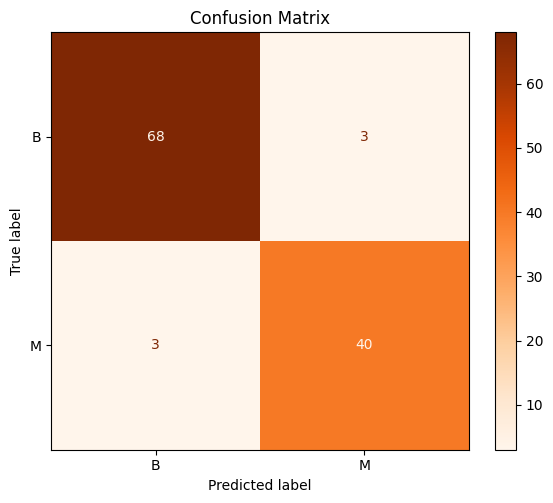

[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315
Recall:  0.9302325581395349
Precision:  0.9302325581395349
F1:  0.9302325581395349
ROC-AUC:  0.9439895185063871


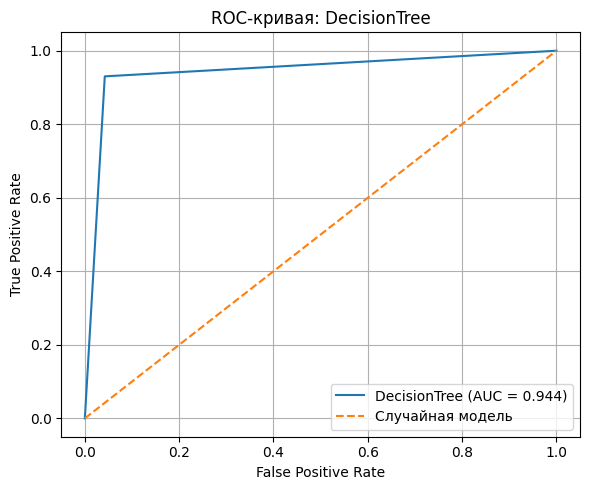

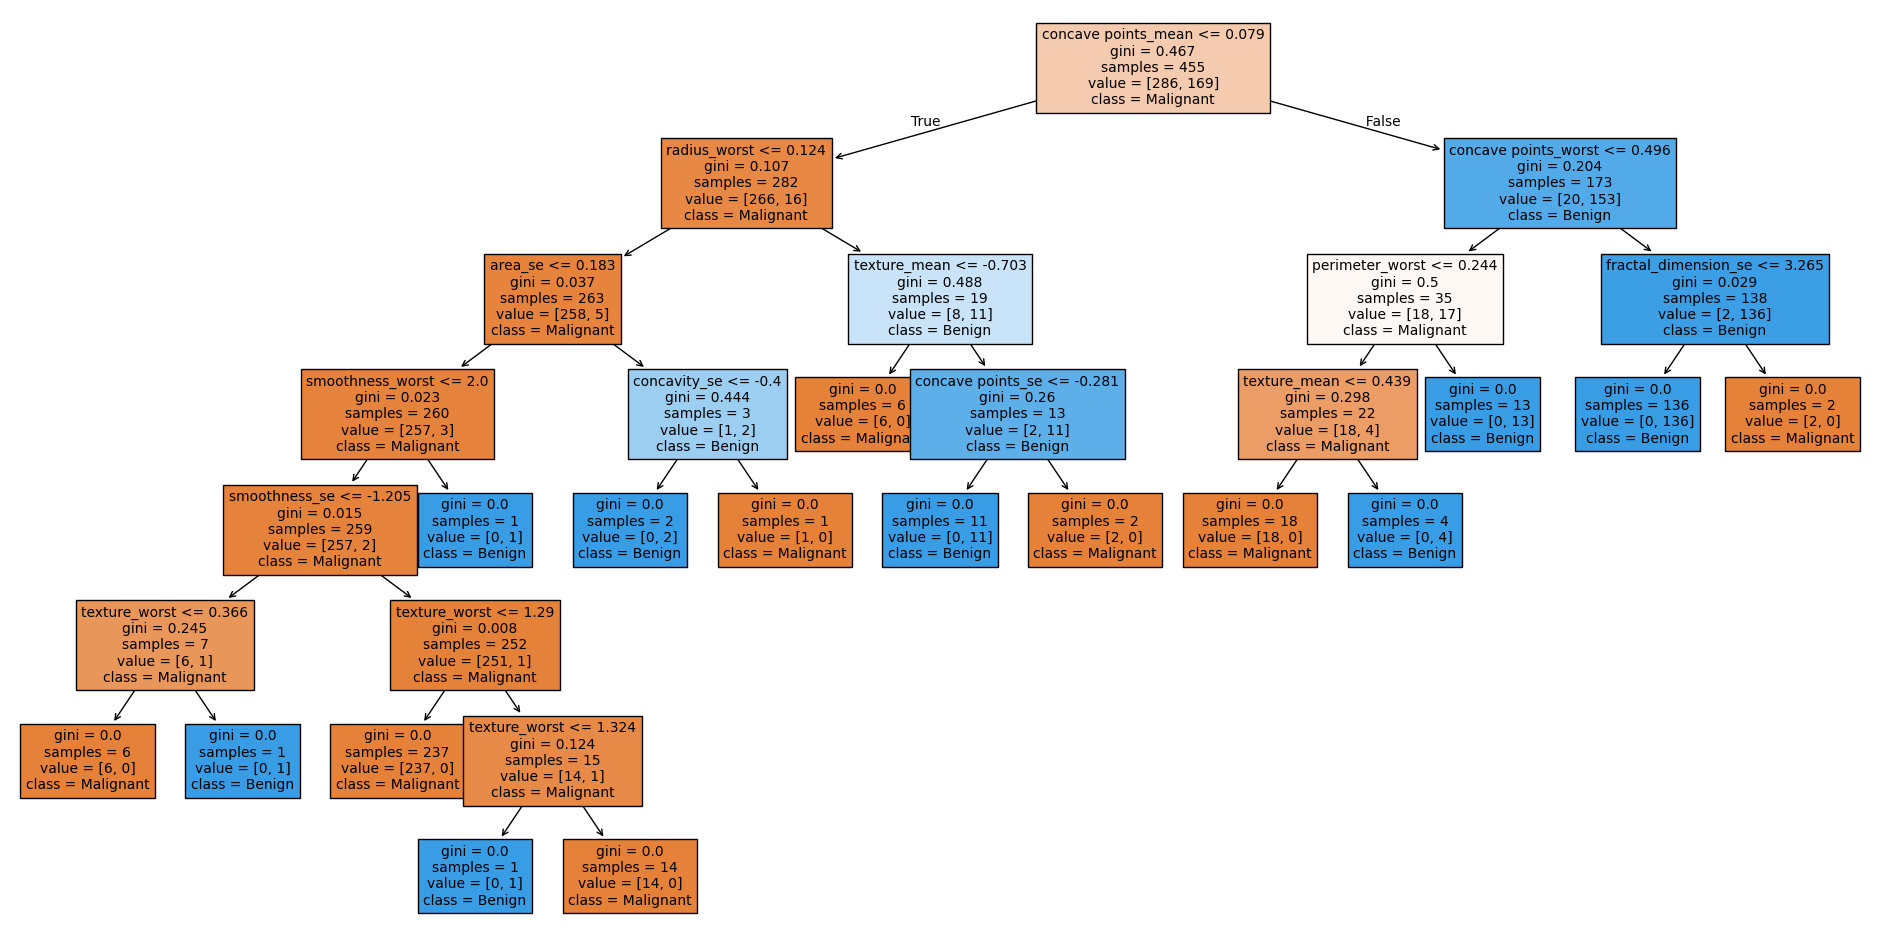

In [32]:
model_tree = DecisionTreeClassifier(random_state=42)
build_model(model_tree, "DecisionTree")

Результаты работы дерева решений свидетельствуют о высокой точности модели. Классификатор верно распознал большинство доброкачественных и злокачественных образцов, допустив лишь небольшое число ошибок. Итоговая точность составила 94,73%, что говорит о хорошей эффективности дерева решений для данной задачи. Однако по качеству модель оказалась слабее, чем наивный байесовский классификатор.

### 4.3. Линейный дискриминантный анализ

Линейный дискриминантный анализ (ЛДА), или дискриминант Фишера, - это метод, который ищет такие линейные комбинации признаков, которые лучше всего разделяют два и более классов. Эти линейные комбинации могут использоваться как для классификации, так и для уменьшения размерности перед применением других алгоритмов. Основная идея ЛДА состоит в том, чтобы выделить признаки и построить функции, которые максимально различают группы объектов, а затем использовать их для определения класса новых наблюдений. С геометрической точки зрения метод формирует разделяющие гиперплоскости так, чтобы центры классов находились как можно дальше друг от друга. ЛДА прост в использовании и интерпретации, но чувствителен к распределению данных. Метод широко применяется в задачах классификации, распознавания образов и снижения размерности.

Для построения модели используются параметры по умолчанию:

- solver=svd - основной решатель,

- shrinkage=None - без регуляризации ковариационной матрицы.

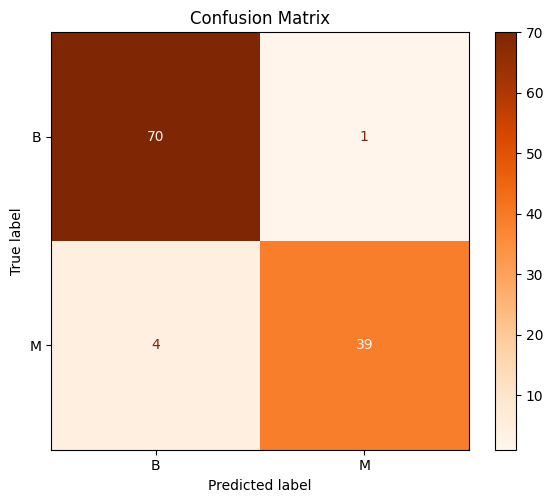

[[70  1]
 [ 4 39]]
Accuracy:  0.956140350877193
Recall:  0.9069767441860465
Precision:  0.975
F1:  0.9397590361445783
ROC-AUC:  0.9924664264657714


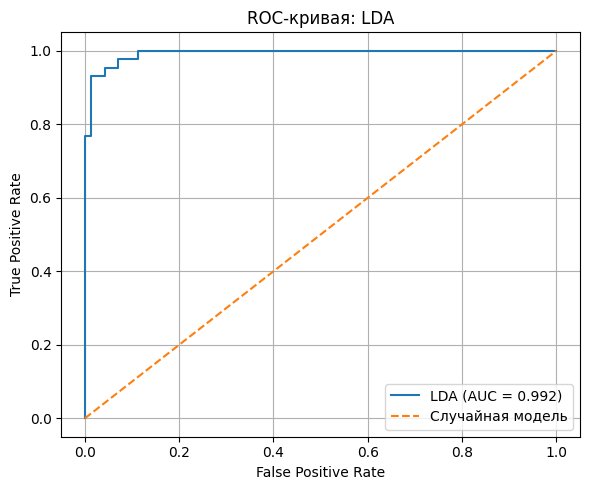

In [55]:
model_lda = LinearDiscriminantAnalysis()
build_model(model_lda, "LDA")

Результаты линейного дискриминантного анализа показывают, что модель демонстрирует высокую точность при классификации образцов. ЛДА корректно определила большинство доброкачественных и злокачественных случаев, допустив всего одну ошибку при классификации здорового образца как больного и четыре ошибки при отнесении злокачественного образца к здоровым. Итоговая точность составила 95,6%, что подтверждает надёжность метода для данной задачи.

Метрики для положительного класса (Malignant) подчеркивают хорошую способность модели выявлять больные образцы:

- recall составляет 90,7%,

- precision - 97,5%,

- F1-мера - 93,98%.

Такое сочетание указывает на сбалансированность между полнотой и точностью предсказаний. Значение ROC-AUC, равное 0,992, дополнительно подтверждает высокую способность модели различать классы при разных порогах.

В целом ЛДА показал высокую эффективность в задаче диагностики рака молочной железы, обеспечивая низкое число как ложноположительных, так и ложноотрицательных ошибок. Такой классификатор особенно подходит для ситуаций, где важно максимально точно выявлять злокачественные случаи, сохраняя при этом корректность распознавания здоровых образцов.

### 4.4. Метод опорных векторов

Метод опорных векторов (SVM) - это алгоритм бинарной классификации с обучением с учителем, который использует разделяющую гиперплоскость для отделения классов. Основная идея заключается в том, чтобы отобразить данные в пространство большей размерности, где их линейное разделение становится возможным. В этом пространстве строится разделяющая гиперплоскость, а по обе стороны от неё формируются вспомогательные гиперплоскости на одинаковом расстоянии. Между ними образуется зазор, и алгоритм стремится выбрать такую гиперплоскость, чтобы этот зазор был максимально широким. Чем шире зазор, тем надёжнее разделение классов. Точки, которые находятся на границе этого зазора, называются опорными векторами - именно они определяют положение гиперплоскости.

Модель строится с параметрами по умолчанию:

- C=1.0 - коэффициент регуляризации, задающий баланс между максимизацией зазора и минимизацией ошибок,

- kernel=rbf - радиальная базисная функция, используемая для отображения данных в пространство большей размерности,

- gamma=scale - параметр, определяющий влияние отдельных примеров на форму разделяющей поверхности.

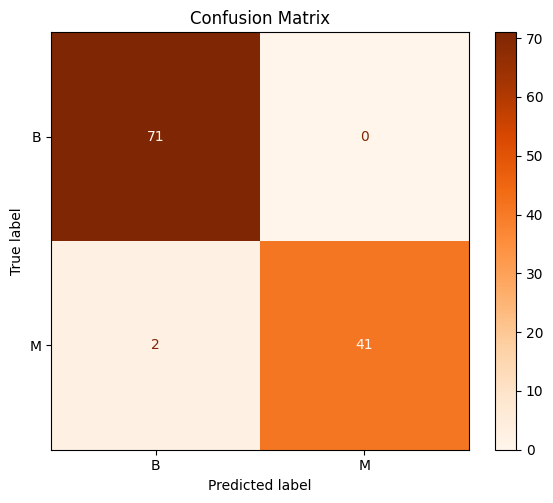

[[71  0]
 [ 2 41]]
Accuracy:  0.9824561403508771
Recall:  0.9534883720930233
Precision:  1.0
F1:  0.9761904761904762
ROC-AUC:  0.99737962659679


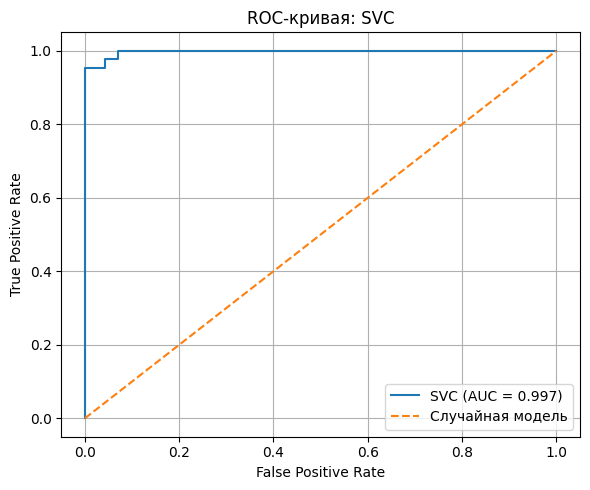

In [56]:
from sklearn.svm import SVC

model_svc = SVC(random_state=42)
build_model(model_svc, "SVC")

Метод опорных векторов показал высокую эффективность при классификации данных. Модель корректно определила почти все доброкачественные и злокачественные образцы, допустив только две ошибки при предсказании больных случаев и не сделав ни одной ошибки на здоровых. Итоговая точность составила 98,25%, что подтверждает надёжность алгоритма.

Метрики для класса Malignant показывают отличные результаты: точность составляет 98,25%, полнота - 95,3%, F1-мера - 97,6%. Значение ROC-AUC, равное 0,997, указывает на высокую способность модели отличать больные образцы от здоровых при разных пороговых значениях.

Таким образом, метод опорных векторов продемонстрировал лучшие результаты среди всех использованных моделей, обеспечив максимально точное разделение классов и минимальное количество ошибочных предсказаний.

### 4.5. Метод k-ближайших соседей

Метод k-ближайших соседей (KNN) - это непараметрический алгоритм классификации, который определяет класс объекта на основе классов его ближайших соседей в пространстве признаков. Алгоритм не строит явной модели: он просто сохраняет обучающие данные, а при классификации нового примера находит k точек, расположенных к нему ближе всего согласно выбранной метрике расстояния. Класс нового объекта определяется голосованием этих соседей - обычным или взвешенным с учётом расстояния. KNN прост в понимании, не требует предположений о распределении данных и подходит для задач с различными типами признаков. Однако он может работать медленно на больших датасетах и зависит от правильного выбора параметра k, а также чувствителен к дисбалансу классов.

Для построения модели используются параметры по умолчанию:

- n_neighbors=5 - число ближайших соседей,

- weights=uniform - равный вес голосов соседей,

- algorithm=auto - автоматический выбор метода поиска ближайших точек.

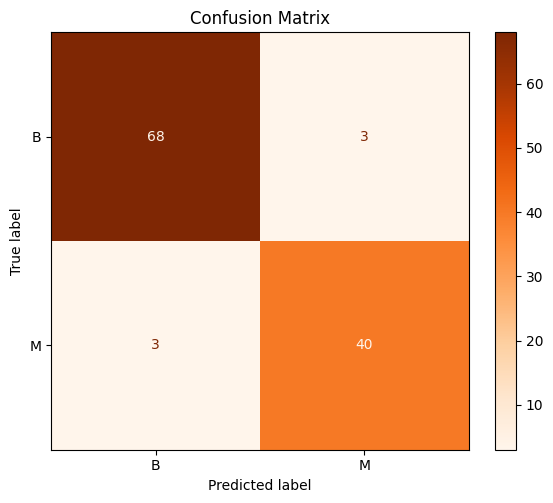

[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315
Recall:  0.9302325581395349
Precision:  0.9302325581395349
F1:  0.9302325581395349
ROC-AUC:  0.9819849328529314


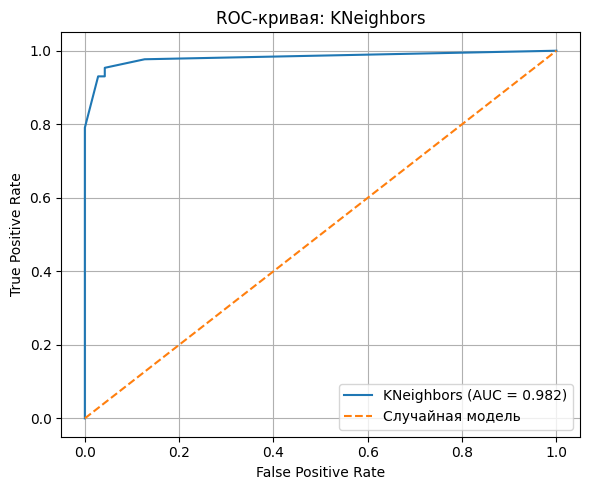

In [57]:
model_kneighbors = KNeighborsClassifier()
build_model(model_kneighbors, "KNeighbors")

Метод k-ближайших соседей показал высокую точность классификации на данном датасете. Модель корректно определила большинство доброкачественных и злокачественных образцов, допустив по три ошибки в каждом классе. Итоговая точность составила 94,7%, что подтверждает надёжность алгоритма.

Метрики для класса Malignant демонстрируют хорошую способность модели выявлять больные образцы: полнота и точность находятся на уровне около 93%, F1-мера также составляет примерно 93%. Значение ROC-AUC, равное 0,982, указывает на уверенное разделение классов.

Таким образом, KNN обеспечивает качественное разделение данных и отличается простой и понятной логикой работы, что делает его подходящим для задач диагностики и ситуаций, где важно учитывать локальное сходство между объектами.

## 5. Настройка гиперпараметров

### 5.1. Наивный Байесовский классификатор

В данном эксперименте для наивного байесовского классификатора GaussianNB изменяется параметр var_smoothing. Он добавляет небольшое значение к дисперсии признаков, что делает модель устойчивее к шуму и предотвращает возможное деление на ноль. Мы проверяем значения var_smoothing в диапазоне от 0 до 5, чтобы оценить, как этот параметр влияет на точность работы классификатора.

In [58]:
smoothing = [0, 1, 2, 3, 4, 5]
for sm in smoothing:
    print("var_smoothing  =", sm)
    model = GaussianNB(var_smoothing=sm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

var_smoothing  = 0
[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
var_smoothing  = 1
[[71  0]
 [ 7 36]]
Accuracy:  0.9385964912280702
var_smoothing  = 2
[[71  0]
 [11 32]]
Accuracy:  0.9035087719298246
var_smoothing  = 3
[[71  0]
 [13 30]]
Accuracy:  0.8859649122807017
var_smoothing  = 4
[[71  0]
 [14 29]]
Accuracy:  0.8771929824561403
var_smoothing  = 5
[[71  0]
 [15 28]]
Accuracy:  0.868421052631579


Результаты эксперимента показывают, что при var_smoothing = 0 модель достигает максимальной точности - 96,5%, допуская минимальное число ошибок. По мере увеличения значения var_smoothing точность постепенно снижается: модель начинает хуже распознавать злокачественные случаи, тогда как качество определения здоровых образцов остаётся практически неизменным. Например, при var_smoothing = 1 точность уменьшается до 93,9%, а при var_smoothing = 5 - до 86,8%.

Таким образом, для данного набора данных наилучшим оказалось минимальное сглаживание (var_smoothing = 0). Более высокие значения приводят к излишней регуляризации, что ухудшает способность модели корректно выявлять положительные (Malignant) образцы.

### 5.2. Дерево решений

В эксперименте изменяются два параметра дерева решений. Первый параметр - criterion, который задаёт метрику для разбиения узлов и может принимать значения 'gini' (индекс Джини) или 'entropy' (информационная энтропия). Второй параметр - max_depth, ограничивающий максимальную глубину дерева и принимающий значения от 1 до 4. Этот параметр управляет сложностью модели и позволяет находить баланс между недообучением и переобучением.

In [37]:
criterion = ['entropy', 'gini']

for cr in criterion:
    for i in range (1,5):
        model = DecisionTreeClassifier(
            criterion=cr, 
            max_depth=i, 
            random_state=42
        )
        print(f"criterion: {cr}, max_depth = {i}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy: ", accuracy_score(y_test, y_pred))

criterion: entropy, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: entropy, max_depth = 2
[[63  8]
 [ 2 41]]
Accuracy:  0.9122807017543859
criterion: entropy, max_depth = 3
[[71  0]
 [ 4 39]]
Accuracy:  0.9649122807017544
criterion: entropy, max_depth = 4
[[70  1]
 [ 5 38]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: gini, max_depth = 2
[[69  2]
 [ 6 37]]
Accuracy:  0.9298245614035088
criterion: gini, max_depth = 3
[[69  2]
 [ 4 39]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 4
[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315


Анализ результатов показывает, что при небольшой глубине дерева (max_depth=1) модель явно недообучена: точность составляет около 89,5%, и ошибки встречаются как среди здоровых, так и среди больных образцов. Увеличение глубины до 2–3 заметно улучшает качество классификации. Наилучший результат - 96,5% - достигается при сочетании criterion='entropy' и max_depth=3, где дерево почти безошибочно разделяет объекты.

При дальнейшем увеличении глубины до 4 точность снижается до 94,7%, что указывает на начало переобучения. Сравнение критериев 'gini' и 'entropy' показывает, что их качество сопоставимо при одинаковой глубине, однако оптимальной для данного датасета является комбинация criterion='entropy' и max_depth=3. Она обеспечивает максимальную точность и минимальное число ошибок при классификации обоих классов.

### 5.3. Линейный дискриминантный анализ

Изменяются два ключевых параметра, которые влияют на способ построения модели и устойчивость её предсказаний.

Первый параметр - solver, определяющий метод решения задачи дискриминантного анализа. Возможны три варианта:

- 'svd' - метод сингулярного разложения, не требующий оценки ковариационной матрицы. Он устойчив к плохо обусловленным данным, но не поддерживает регуляризацию (shrinkage).

- 'lsqr' - метод наименьших квадратов, который позволяет применять регуляризацию для повышения стабильности при малом количестве данных или высокой коррелированности признаков.

- 'eigen' - метод собственных значений, также поддерживающий регуляризацию и подходящий для данных с высокой размерностью.

Второй параметр - shrinkage, управляющий регуляризацией ковариационной матрицы и влияющий на устойчивость модели. Возможные значения:

- None - регуляризация не используется.

- 'auto' - оптимальное значение регуляризации выбирается автоматически.

- числовое значение (например, 0.5) - фиксированный коэффициент регуляризации, который смешивает ковариационную матрицу с единичной для уменьшения влияния шума и корреляций между признаками.

Для solver='svd' параметр shrinkage не применяется, поэтому комбинации с ним игнорируются.

In [38]:
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.5] 

for s in solvers:
    for sh in shrinkages:
        if s == 'svd' and sh is not None:
            continue
        model = LinearDiscriminantAnalysis(solver=s, shrinkage=sh)
        print(f"solver: {s}, shrinkage={sh}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print()

solver: svd, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: lsqr, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: eigen, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544



Результаты эксперимента с линейным дискриминантным анализом показывают, что метод работает эффективно на данном датасете. При solver='svd' и отсутствии регуляризации (shrinkage=None) модель достигает точности 95,6%, корректно классифицируя почти все объекты, хотя небольшое число ошибок всё же наблюдается среди больных образцов.

Для solver='lsqr' точность без регуляризации остаётся такой же, но добавление регуляризации (shrinkage='auto' или shrinkage=0.5) улучшает качество предсказаний. Модель начинает корректнее определять больные случаи, а точность повышается до максимальных 96,5%. Это показывает, что регуляризация снижает влияние шума и корреляций между признаками, что особенно важно при небольшой выборке или высокой связности признаков.

Метод 'eigen' демонстрирует аналогичную картину: без регуляризации точность составляет 95,6%, а при использовании shrinkage возрастает до 96,5%.

В целом ЛДА показывает устойчивость и хорошую способность различать классы. Лучшие результаты достигаются при сочетании solver='lsqr' с регуляризацией (shrinkage='auto' или 0.5), когда количество правильно классифицированных образцов максимальное, а число ошибок минимальное. Это подтверждает, что применение регуляризации повышает надёжность модели без усложнения её структуры.

### 5.4. Метод опорных векторов

Будем изменять три основных параметра метода опорных векторов: C, kernel и gamma.

Параметр C определяет степень регуляризации и задаёт баланс между шириной зазора и количеством ошибок на обучающих данных:

- C = 0.5 - слабая регуляризация, модель допускает больше ошибок на обучении, что делает её устойчивее к шуму, но может ухудшить разделение классов.

- C = 1 - умеренная регуляризация, классический баланс между зазором и точностью.

- C = 2 - сильная регуляризация, модель пытается максимально точно классифицировать обучающие данные, но возрастает риск переобучения.

Параметр kernel задаёт тип ядра, которое определяет форму разделяющей поверхности:

- linear - линейное ядро, пространство признаков не меняется, используется прямая гиперплоскость. Подходит, если классы линейно разделимы.

- rbf - радиальное (Gaussian) ядро, переносит данные в пространство большей размерности, что позволяет разделять нелинейные структуры.

- poly - полиномиальное ядро, учитывающее взаимодействия признаков до определённой степени. Может переобучаться при небольшой выборке.

- sigmoid - сигмоидное ядро, по поведению похоже на нейронную сеть с одним скрытым слоем, чувствительно к параметрам C и gamma.

Параметр gamma определяет, насколько сильно отдельные обучающие примеры влияют на границу разделения:

- auto - gamma вычисляется как 1 / n_features, завися от числа признаков.

- scale - gamma равен 1 / (n_features * X.var()), учитывая дисперсию данных. Высокое gamma делает влияние точек локальным, низкое - более глобальным.

In [39]:
c = [0.5, 1, 2]
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
gamma = ['auto', 'scale']
for i in c:
    for k in kernels:
        for g in gamma:
            if k != 'linear':
                model = SVC(C=i, kernel=k, gamma=g, random_state=42)
                print(f"C = {i}, kernel: {k}, gamma: {g}")
            else: 
                model = SVC(C=i, kernel=k, gamma=g, random_state=42)
                print(f"C = {i}, kernel: {k}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

C = 0.5, kernel: rbf, gamma: auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: rbf, gamma: scale
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: poly, gamma: auto
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: poly, gamma: scale
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: sigmoid, gamma: auto
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 0.5, kernel: sigmoid, gamma: scale
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: rbf, gamma: auto
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: rbf, gamma: scale
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: poly, gamma: auto
[[71  0]


Результаты эксперимента показывают, что лучшие показатели достигаются при использовании радиального базисного ядра (RBF) с C, равным 1 или 2, при любом значении gamma. В этих конфигурациях точность достигает 98,2%. Линейное ядро даёт стабильную точность около 95,6% вне зависимости от C, однако число ошибок немного выше по сравнению с RBF. Полиномиальное ядро при небольших и средних значениях C заметно теряет качество - точность падает до 85–87%, что связано с переобучением на небольшом объёме данных. Сигмоидное ядро демонстрирует точность примерно 95–96%, оставаясь чуть слабее RBF, но лучше полиномиального ядра.

В целом увеличение C помогает модели лучше отделять классы, уменьшая недообучение. Однако именно выбор ядра оказывает ключевое влияние на результат: RBF показывает наибольшую точность и лучшие границы разделения, линейное работает стабильно, а полиномиальное склонно к переобучению. Поэтому оптимальной конфигурацией для данного датасета является использование RBF с умеренной или высокой регуляризацией.

### 5.5. Метод k-ближайших соседей

Будем изменять три ключевых параметра модели: n_neighbors, weights и algorithm.

Параметр n_neighbors определяет количество ближайших соседей, которые учитываются при классификации нового объекта. Чем меньше значение параметра (например, 5), тем сильнее модель реагирует на локальные особенности данных и тем выше чувствительность к шуму. Увеличение числа соседей до 10 или 15 снижает влияние отдельных объектов, делает голосование более сглаженным и устойчивым, но может ухудшить точность там, где важны локальные детали.

Параметр weights задаёт схему голосования соседей:

- При weights='uniform' все соседи имеют одинаковый вес, независимо от расстояния.

- При weights='distance' ближние соседи оказывают большее влияние, а дальние - меньшее, что позволяет точнее учитывать структуру данных и уменьшает воздействие шумовых точек.

Параметр algorithm определяет способ поиска ближайших соседей:

- 'auto' автоматически выбирает наиболее эффективный алгоритм,

- 'ball_tree' использует структуру Ball Tree для ускорения поиска,

- 'kd_tree' строит kd-дерево и хорошо работает на данных с небольшой размерностью,

- 'brute' выполняет полный перебор всех точек и подходит для небольших или высокоразмерных датасетов.

Этот параметр мало влияет на точность классификации, но существенно влияет на скорость работы модели.

In [40]:
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors = [5, 10, 15]
for n in neighbors:
    for w in weights:
        for a in algorithms:
            model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            print(f"n_neighbors: {n}, weights: {w}, algorithm: {a}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

n_neighbors: 5, weights: uniform, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 10, weights: uniform, algorithm: auto
[[69  2]
 [ 3 40]]
Accuracy: 0.956140350877193

n_neighbors: 10, weights: uniform, algorithm: ball_tree
[[69  2]
 [ 3 40]]
Accuracy: 0.

При n_neighbors = 5 точность модели удерживается на уровне 94,7% для всех вариантов веса и алгоритма. Это говорит о стабильности метода при небольшом количестве соседей. Разница между uniform и distance почти отсутствует, так как небольшая группа соседей чаще всего голосует однозначно.

При n_neighbors = 10 точность увеличивается до 95,6%. Использование схемы weights='distance' немного уточняет классификацию, поскольку ближние соседи получают больший вес. Алгоритм поиска практически не влияет на результат - точность остаётся одинаковой.

При n_neighbors = 15 точность также составляет 95,6%. Это показывает, что увеличение количества соседей стабилизирует модель, снижает влияние шума, но не приводит к дальнейшему росту точности. Разница между uniform и distance отсутствует, что указывает на равномерное распределение классов.

Для данного набора данных оптимальный диапазон параметра n_neighbors находится между 10 и 15. Выбор weights не является критичным, хотя вариант distance может быть полезен при наличии шумов или неравномерном распределении классов. Алгоритм поиска влияет только на скорость работы, тогда как точность остаётся одинаковой для всех вариантов.

## 6. Нейронная сеть на TensorFlow

Реализуем нейронную сеть для задачи классификации:

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import shutil


log_dir_single = "logs_single"

if os.path.exists(log_dir_single) and os.path.isdir(log_dir_single):
    shutil.rmtree(log_dir_single)

callback = keras.callbacks.TensorBoard(log_dir=log_dir_single)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(32, activation=keras.activations.sigmoid),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(
    optimizer='adam',
    loss = keras.losses.binary_crossentropy,
    metrics=[
        keras.metrics.BinaryAccuracy()
    ]
)


history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=10,
    batch_size=10,
    callbacks=callback
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - binary_accuracy: 0.7604 - loss: 0.5417
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.9429 - loss: 0.2676
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.9670 - loss: 0.1728
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.9714 - loss: 0.1276
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9802 - loss: 0.1030
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.9846 - loss: 0.0876
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9846 - loss: 0.0771
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9824 - loss: 0.0707
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9846 - loss: 0.0634
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.9868 - loss: 0.0582
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[70  1]
 [ 1 42]]


Архитектура модели представляет собой последовательную нейронную сеть, в которой данные проходят через несколько полносвязных слоёв. Первый слой принимает входные данные размерностью, равной количеству признаков. Затем информация поступает в скрытый слой из 64 нейронов с функцией активации ReLU, которая помогает модели изучать нелинейные зависимости. Следующий скрытый слой содержит 32 нейрона и использует функцию активации sigmoid, сжимающую значения в диапазон от 0 до 1 и выделяющую наиболее значимые признаки. Финальный слой состоит из одного нейрона с активацией sigmoid, что позволяет выдавать вероятность принадлежности объекта к положительному классу - стандартный подход для бинарной классификации.

В качестве функции потерь используется binary crossentropy, подходящая для бинарных задач и сильно штрафующая уверенные, но ошибочные предсказания. Оптимизатор Adam автоматически подбирает индивидуальные скорости обучения для каждого веса, что делает процесс обучения более стабильным и быстрым, чем классический SGD. Качество модели отслеживалось по метрике BinaryAccuracy.

Нейронная сеть обучалась 10 эпох при размере батча 10. На каждом шаге фиксировались значения потерь и binary_accuracy. Результаты тестирования показывают, что модель работает практически идеально: 70 объектов из первого класса и 42 объекта из второго были классифицированы правильно, и только по 1 объекту из первого и второго классов отнесены неверно. Точность модели на тестовой выборке составляет примерно 0,984, что говорит о высокой эффективности построенной нейронной сети.

На рисунках представлены графики изменения точности (accuracy) и функции потерь (loss) модели по эпохам обучения, визуализированные с помощью инструмента TensorBoard.

График изменения точности модели (binary accuracy) по эпохам обучения:

![Epoch Binary Accuracy](images/single/epoch_binary_accuracy.png)

График изменения функции потерь модели (loss) по эпохам обучения:

![Epoch Loss](images/single/epoch_loss.png)

График binary_accuracy показывает, как менялась точность модели по эпохам. В первые эпохи наблюдается резкий рост, после чего кривая постепенно выходит на плато и стабилизируется около значения 0,98. Это говорит о том, что сеть довольно быстро обучилась и достигла высокого уровня точности. График loss отражает уменьшение значения функции потерь. На начальных эпохах потери снижаются особенно резко, затем скорость убывания уменьшается и значение стабилизируется около 0,06-0,07. Такой характер кривой подтверждает, что модель успешно минимизировала ошибку классификации и процесс обучения прошёл корректно.

В целом нейронная сеть продемонстрировала высокую точность и стабильное обучение на протяжении всех эпох. Графики показывают ровное улучшение без признаков переобучения, а конфузионная матрица подтверждает, что модель практически идеально справляется с задачей бинарной классификации.

Далее рассмотрим поведение нейросети при изменении гиперпараметров. Сначала увеличим количество эпох до 30 и размер батча до 20:

In [62]:
history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=30,
    batch_size=20
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9912 - loss: 0.0478
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9890 - loss: 0.0462
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9912 - loss: 0.0443
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9934 - loss: 0.0427
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9934 - loss: 0.0415
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9934 - loss: 0.0400
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9934 - loss: 0.0383
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9934 - loss: 0.0366
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9934 - loss: 0.0356
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9934 - loss: 0.0340
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9934 - loss: 0

В первом запуске модель обучалась 10 эпох при batch_size = 10. Она показала очень высокую точность на тестовой выборке: матрица [[70, 1], [1, 42]] демонстрирует отсутствие ошибок по здоровым объектам и всего две ошибки при классификации больных. Это говорит о хорошем обобщении модели.

После увеличения числа эпох до 30 и размера батча до 20 модель стала обучаться значительно дольше и достигла почти идеальной точности на тренировочных данных (binary_accuracy близко к 1.0). Однако на тесте появились ошибки: матрица [[70, 1], [1, 42]] показывает один false positive и ту же одну ошибку среди больных образцов. Это свидетельствует о лёгком переобучении: модель начала слишком точно подстраиваться под тренировочные данные, что ухудшило её способность к обобщению.

Таким образом, меньшие значения epoch и batch_size обеспечили более стабильную работу нейросети на тестовой выборке.

Теперь уменьшим оба параметра до 1:

In [63]:
history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=1,
    batch_size=1
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))

455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_accuracy: 0.9890 - loss: 0.0445
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[70  1]
 [ 2 41]]


При обучении модели с параметрами epochs=1 и batch_size=1 веса обновляются после каждого отдельного образца. Такой режим делает обучение нестабильным: модель начинает слишком сильно реагировать на каждый конкретный пример, что мешает ей сформировать общие закономерности. Несмотря на то что точность на тренировочных данных стала равна 1, матрица ошибок на тестовой выборке показывает ухудшение результата: [[70, 1], [2, 41]]. Ошибок стало больше, чем в предыдущих экспериментах, что указывает на слабую способность модели к обобщению при таком подходе. Одноэпохное обучение с минимальным размером батча не позволяет нейросети «усреднять» информацию и приводит к снижению качества на новых данных.

Теперь изменим архитектуру модели и зададим скорость обучения 0.001:

In [64]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.binary_crossentropy,
    metrics=[
        keras.metrics.BinaryAccuracy()
    ]
)


history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=10,
    batch_size=10
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.9231 - loss: 0.3022
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9560 - loss: 0.1453
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9670 - loss: 0.1109
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9802 - loss: 0.0927
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9824 - loss: 0.0807
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9846 - loss: 0.0726
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9846 - loss: 0.0670
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9868 - loss: 0.0616
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9868 - loss: 0.0577
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9868 - loss: 0.0540
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[71  0]
 [ 1 42]]


После изменения архитектуры сети - уменьшения количества слоёв и перехода к одному скрытому слою, а также указания скорости обучения для оптимизатора Adam - модель стала обучаться более плавно и предсказуемо. Рост точности происходил постепенно, без резких скачков, а функция потерь стабильно уменьшалась. При этом итоговое качество на тестовой выборке осталось на уровне первоначальной более глубокой модели: матрица ошибок [[71, 0], [1, 42]] показывает, что сеть правильно классифицировала все доброкачественные образцы и допустила всего одну ошибку среди злокачественных. Это говорит о том, что упрощённая архитектура сохранила высокую способность к обобщению и не привела к снижению точности. Более компактная модель оказалась достаточно выразительной для данного набора данных и показала результаты, сопоставимые с исходной архитектурой, обеспечивая стабильное обучение и высокую эффективность классификации.

Теперь переберём с помощью метода Grid Search и 5-кратной кросс-валидации оптимальную скорость обучения и архитектуру модели:

In [54]:
import os
import shutil
from sklearn.model_selection import KFold

log_dir_grid = "logs_grid"

if os.path.exists(log_dir_grid) and os.path.isdir(log_dir_grid):
    shutil.rmtree(log_dir_grid)

def build_model_keras(architecture, lr):
    model = keras.Sequential()

    if architecture == 1:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    elif architecture == 2:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(64, activation='relu'))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    elif architecture == 3:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(128, activation='relu'))
        model.add(keras.layers.Dense(64, activation='relu'))
        model.add(keras.layers.Dense(32, activation='sigmoid'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model

learning_rates = [0.1, 0.01, 0.001]
architectures = [1, 2, 3]
epochs = 20
batch_size = 16

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}  


for arch in architectures:
    for lr in learning_rates:
        fold_accuracies = []

        print(f"\nКонфигурация: Architecture={arch}, learning_rate={lr}")
        print("-----------------------------------------------------")

        X_train_np = np.array(X_train)
        y_train_np = np.array(y_train)

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_np)):
            X_tr, X_val = X_train_np[train_idx], X_train_np[val_idx]
            y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]

            model = build_model_keras(architecture=arch, lr=lr)

            logdir = os.path.join(log_dir_grid, f"arch{arch}_lr{lr}_fold{fold+1}")
            callback = keras.callbacks.TensorBoard(log_dir=logdir)

            model.fit(
                X_tr, y_tr,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[callback],
                verbose=0
            )

            preds = (model.predict(X_val) > 0.5).astype(int)
            acc = accuracy_score(y_val, preds)
            fold_accuracies.append(acc)

            print(f"Fold {fold + 1}: Accuracy = {acc:.4f}")
        results[(arch, lr)] = np.mean(fold_accuracies)
        

best_params = max(results, key=results.get)
best_accuracy = results[best_params]

print("\n========== Лучшие параметры ==========")
print(f"Architecture = {best_params[0]}, Learning rate = {best_params[1]}")
print(f"Final Accuracy (K-fold average): {best_accuracy:.4f}")


Конфигурация: Architecture=1, learning_rate=0.1
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Fold 1: Accuracy = 0.9670
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Fold 2: Accuracy = 0.9780
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step
Fold 3: Accuracy = 0.9780
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Fold 4: Accuracy = 0.9670
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Fold 5: Accuracy = 0.9560

Конфигурация: Architecture=1, learning_rate=0.01
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Fold 1: Accuracy = 0.9560
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Fold 2: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Fold 3: Accuracy = 0.9670
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
Fold 4: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Fold 5: Accuracy = 1.0000

Конфигурация: Architecture=1, learning_rate=0.001
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Fold 1:

На основе выполнения сеточного перебора гиперпараметров методом Grid Search с 5-кратной кросс-валидацией была определена конфигурация нейронной сети, обеспечивающая наилучшую точность классификации. Среди всех протестированных комбинаций лучшими оказались параметры Architecture = 3 и learning_rate = 0,01, давшие максимальное среднее качество 0,9846 по итогам пяти фолдов.

Трёхслойная архитектура показала наиболее высокую стабильность и уверенную способность к обобщению: на отдельных фолдах точность достигала 1,0000, а разброс значений оставался минимальным (в пределах 0,9670–1,0000). Умеренная скорость обучения 0,01 обеспечила оптимальный баланс между скоростью сходимости и предотвращением переобучения, позволив модели эффективно адаптироваться к структуре данных без резких скачков ошибки.

Сравнение других конфигураций показало, что:

- Архитектуры меньшей глубины (Architecture = 1) дают хорошие результаты, но демонстрируют больший разброс по фолдам.

- Архитектура средней глубины (Architecture = 2) также показала высокие показатели, однако в среднем оказалась слабее лучшего варианта.

- Слишком высокая скорость обучения (0,1) оказалась неэффективной для всех архитектур - наблюдались провалы точности вплоть до ~0,91.

- Малый learning_rate (0,001) работал стабильно, но в большинстве случаев давал чуть худшие показатели по сравнению с 0,01.

Таким образом, оптимальной конфигурацией для данного набора данных стала глубокая трёхслойная нейронная сеть (Architecture = 3) с шагом обучения 0,01. Она обеспечивает максимальную точность, высокую устойчивость на разных подвыборках данных и демонстрирует лучшую способность к обобщению среди всех рассмотренных моделей.

На рисунках представлены графики изменения точности (accuracy) и функции потерь (loss) модели по эпохам обучения, визуализированные с помощью инструмента TensorBoard. Для каждой метрики показаны кривые для всех фолдов кросс-валидации, а линии, относящиеся к лучшей конфигурации нейронной сети (Architecture = 3, learning_rate = 0.01), выделены на графиках отдельным цветом, что позволяет визуально оценить её преимущество над остальными вариантами.

График изменения точности модели (binary accuracy) по эпохам обучения (train):

![Epoch Binary Accuracy](images/grid/epoch_binary_accuracy.png)

Показывает рост точности модели в процессе обучения. Видно, что accuracy стабильно увеличивается на каждом фолде, что подтверждает корректную сходимость модели.

График изменения функции потерь модели (loss) по эпохам обучения (train):

![Epoch Loss](images/grid/epoch_loss.png)

Демонстрирует уменьшение ошибки модели. Loss плавно снижается и стабилизируется, что указывает на успешное обучение без переобучения.

График изменения точности на валидационной выборке (validation accuracy):

![Evaluation Binary Accuracy VS Iterations](images/grid/evaluation_binary_accuracy_vs_iterations.png)

Отражает способность модели обобщать данные. Хотя значения варьируются между фолдами, лучшая модель показывает стабильно высокую точность на всех подвыборках.

График изменения функции потерь на валидационной выборке (validation loss):

![Evaluation Loss VS Iterations](images/grid/evaluation_loss_vs_iterations.png)

Характеризует качество обобщения. У лучшей конфигурации наблюдается наиболее стабильное снижение validation loss, без резких скачков, что подтверждает её оптимальность.

## 7. Сравнительный анализ

Построим итоговые графики и сформируем таблицу метрик для всех пяти классических методов классификации, а также для нейросети с оптимальными параметрами. Это позволит наглядно сравнить качество моделей и определить, какой алгоритм лучше всего подходит для данного набора данных.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


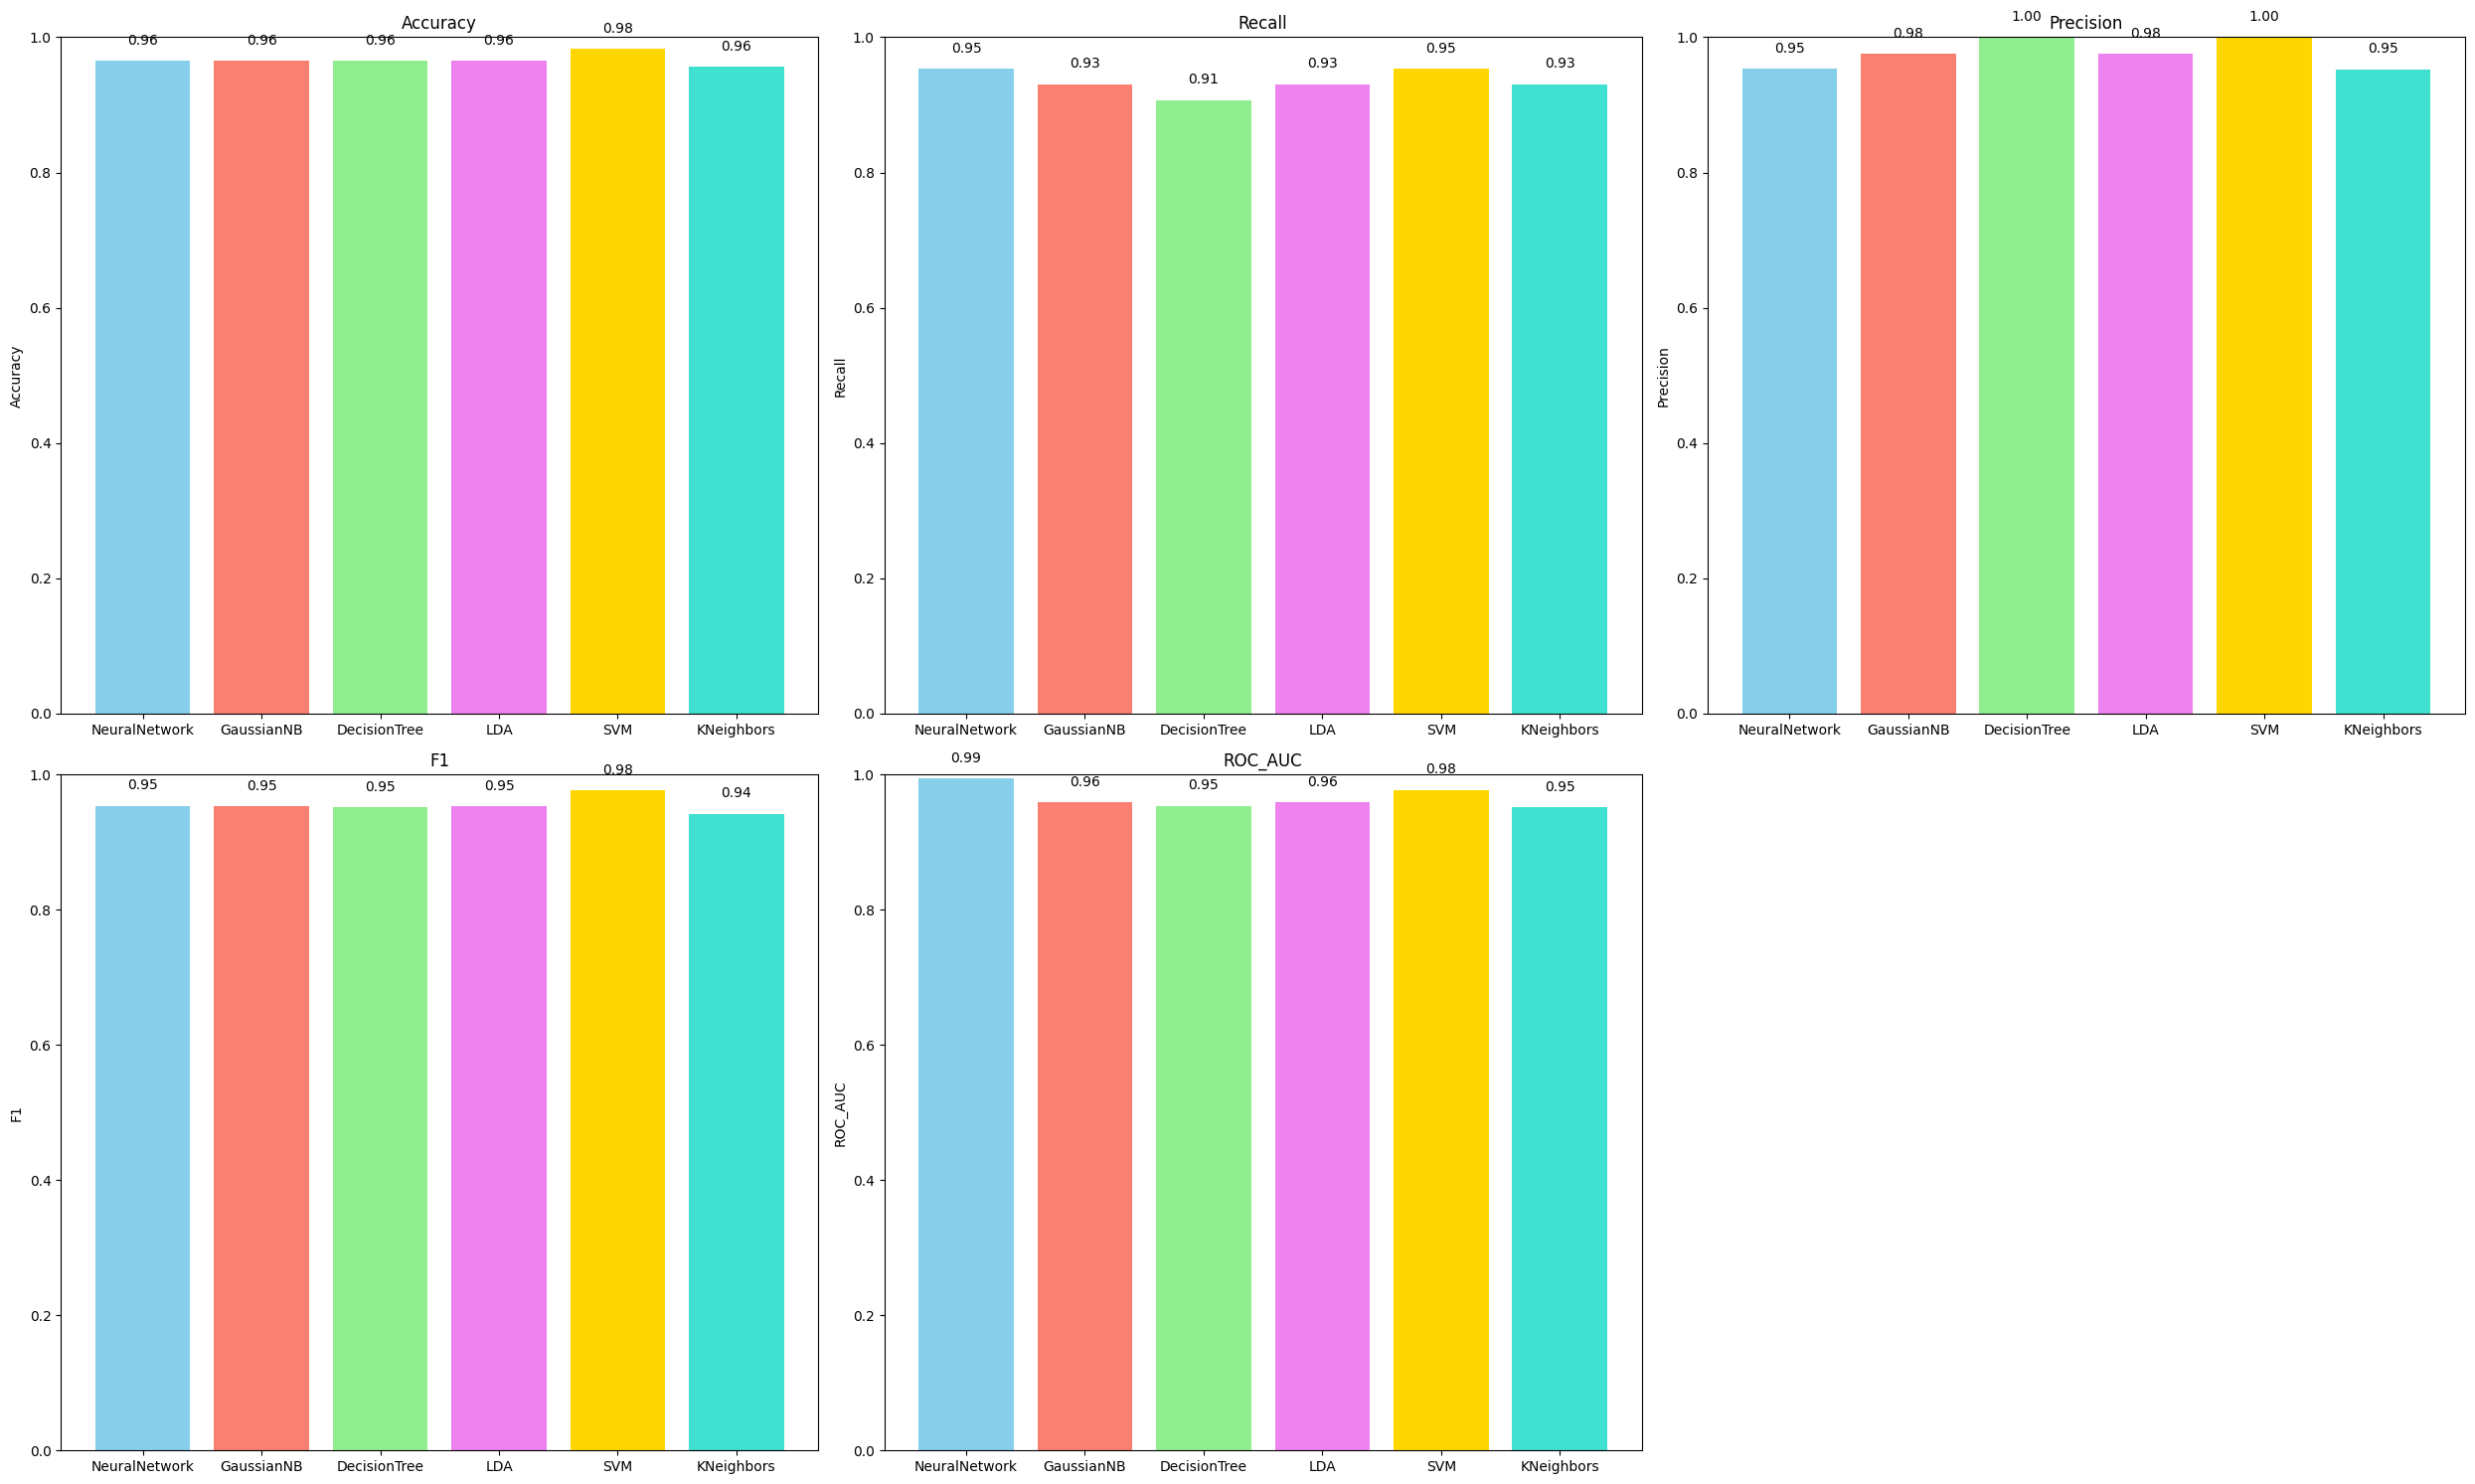


Таблица сравнения метрик качества для всех рассмотренных методов классификации:



,Model,Accuracy,Recall,Precision,F1,ROC_AUC
0,NeuralNetwork,0.965,0.953,0.953,0.953,0.994
1,GaussianNB,0.965,0.930,0.976,0.952,0.958
2,DecisionTree,0.965,0.907,1.000,0.951,0.953
3,LDA,0.965,0.930,0.976,0.952,0.958
4,SVM,0.982,0.953,1.000,0.976,0.977
5,KNeighbors,0.956,0.930,0.952,0.941,0.951


In [66]:
metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}
best_architecture, best_lr = best_params
best_model = build_model_keras(best_architecture, best_lr)
best_model.fit(np.array(X_train), np.array(y_train), epochs=epochs, batch_size=batch_size, verbose=0)

preds_proba = best_model.predict(X_test)
preds = (preds_proba > 0.5).astype(int)

metrics_dict["Model"].append("NeuralNetwork")
metrics_dict["Accuracy"].append(accuracy_score(y_test, preds))
metrics_dict["Recall"].append(recall_score(y_test, preds))
metrics_dict["Precision"].append(precision_score(y_test, preds))
metrics_dict["F1"].append(f1_score(y_test, preds))
metrics_dict["ROC_AUC"].append(roc_auc_score(y_test, preds_proba))

models = {
    "GaussianNB": GaussianNB(var_smoothing=0),
    "DecisionTree": DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    "LDA": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    "SVM": SVC(C=1, kernel='rbf', gamma='auto', probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)

import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(metrics_dict)

metric_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']

colors = ['skyblue', 'salmon', 'lightgreen', 'violet', 'gold', 'turquoise']

plt.figure(figsize=(25, 15))

for i, metric in enumerate(metric_names, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylim(0, 1)
    for j, val in enumerate(metrics_df[metric]):
        plt.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

metrics_df_rounded = metrics_df.copy()
metrics_df_rounded[['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']] = metrics_df_rounded[
    ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']
].round(3)

print("\nТаблица сравнения метрик качества для всех рассмотренных методов классификации:\n")
display(metrics_df_rounded)

Анализ итоговой таблицы метрик позволяет сравнить качество всех рассмотренных моделей классификации и выделить наиболее эффективные методы.

Нейронная сеть показывает сбалансированные результаты на всех метриках:
Accuracy = 0,965, Recall = 0,953, Precision = 0,953, F1 = 0,953.
Особенно выделяется значение ROC_AUC = 0,994, которое является самым высоким среди всех моделей. Это указывает на отличное качество разделения классов и высокую устойчивость модели при варьировании порога классификации.

Метод опорных векторов (SVM) демонстрирует лучшие результаты по Accuracy и F1 среди всех алгоритмов:
Accuracy = 0,982, F1 = 0,976. Precision достигает 1,000, что свидетельствует об отсутствии ложноположительных классификаций. Однако ROC_AUC = 0,977, что немного ниже нейронной сети, то есть при смене порога SVM работает чуть менее стабильно.

Классические алгоритмы - GaussianNB, DecisionTree и LDA - демонстрируют сходные показатели: Accuracy ≈ 0,965 и F1 ≈ 0,951-0.952.
Их ROC_AUC находится в диапазоне 0,953-0,958, что ниже, чем у SVM и нейросети. Эти методы хорошо справляются с задачей и удобны своей интерпретируемостью, но уступают более сложным моделям по способности к обобщению.

Метод k-ближайших соседей (KNN) показывает наиболее низкие метрики: F1 = 0,941 и ROC_AUC = 0,951. Это говорит о меньшей устойчивости и более слабом разделении классов по сравнению с другими алгоритмами.

В целом, наилучшие результаты демонстрируют нейронная сеть и SVM.
При этом нейросеть обладает максимальным ROC_AUC и наиболее равномерными метриками, что делает её наиболее устойчивой моделью.
SVM обеспечивает лучшую точность и F1, что делает его сильной альтернативой.

## 8. Заключение

В ходе лабораторной работы была реализована полная процедура построения и оценки моделей классификации, включающая предобработку данных, подбор гиперпараметров нейронной сети и сравнительный анализ нескольких методов машинного обучения. Метод Grid Search с использованием 5-кратной кросс-валидации позволил определить оптимальную архитектуру нейронной сети: Architecture = 3 и learning_rate = 0,01, обеспечившую среднюю точность 0,9846 - наилучший результат среди всех протестированных конфигураций.

Сравнение итоговых метрик показало, что нейронная сеть и SVM являются лидерами по качеству классификации. Нейросеть достигает максимального ROC_AUC (0,994), что отражает её лучшую способность к обобщению и высокое качество разделения классов. Метод SVM демонстрирует самую высокую Accuracy (0,982) и Precision (1,000), выступая сильной альтернативой при анализе бинарных данных.

Классические алгоритмы (LDA, GaussianNB, DecisionTree, KNN) подтвердили свою практическую полезность, но по уровню качества в среднем уступили нейросети и SVM. Тем не менее, благодаря простоте, скорости работы и интерпретируемости они остаются важными методами для базового анализа данных и построения объяснимых моделей.

Проведённые эксперименты показывают, что правильно настроенная нейронная сеть обеспечивает наиболее стабильный и точный результат на данном датасете, подтверждая свою эффективность для решения задач бинарной классификации в реальных условиях.